In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns=1500
pd.options.display.max_rows=1500
np.set_printoptions(suppress=True)

%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/iqbalamo93/Datasets/master/Clustering/seeds.csv'
header = ['area','perimeter','compactness','lengthOfKernel',
 'widthOfKernel','asymmetryCoefficient','lengthOfkernelGroove','Variety']
seed = pd.read_csv(url,names=header)
mapper = {1:'Kama',2:'Rosa',3:'Canadian'}
seed['Names'] = seed['Variety'].map(mapper)
seed.head()

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfkernelGroove,Variety,Names
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,Kama


In [3]:
seed['Names'].value_counts()#index.to_list()

Canadian    70
Kama        70
Rosa        70
Name: Names, dtype: int64

In [4]:
seed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   area                  210 non-null    float64
 1   perimeter             210 non-null    float64
 2   compactness           210 non-null    float64
 3   lengthOfKernel        210 non-null    float64
 4   widthOfKernel         210 non-null    float64
 5   asymmetryCoefficient  210 non-null    float64
 6   lengthOfkernelGroove  210 non-null    float64
 7   Variety               210 non-null    int64  
 8   Names                 210 non-null    object 
dtypes: float64(7), int64(1), object(1)
memory usage: 14.9+ KB


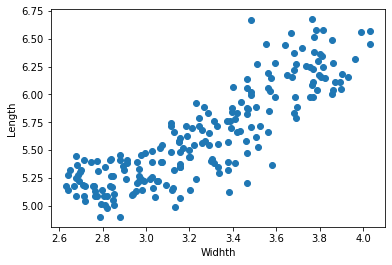

correlation: 0.8604149377143466

pvalue 8.121332906193694e-63


In [5]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assign column of grains: width
width = seed.iloc[:,4].values

# Assign column of grains: length
length = seed.iloc[:,3].values
# Scatter plot width vs length
plt.scatter(width, length)
plt.xlabel('Widhth')
plt.ylabel('Length')
#plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print('correlation:',correlation,end='\n\n')
print('pvalue',pvalue)


Great work! As you would expect, the width and length of the grain samples are highly correlated

### Decorrelating the grain measurements with PCA

You observed in the previous exercise that the width and length measurements of the grain are correlated. Now, you'll use PCA to decorrelate these measurements, then plot the decorrelated points and measure their Pearson correlation.

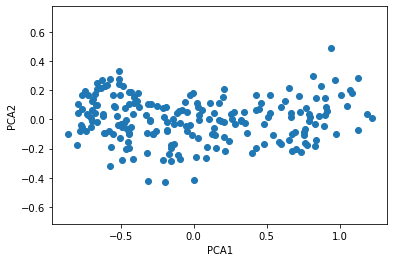

2.5478751053409354e-17

pvalue 0.999999999999971

Shape is (210, 2)
Components are: 
 [[ 0.63910027  0.76912343]
 [-0.76912343  0.63910027]]


In [6]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
grains = np.vstack((width,length)).T#seed.iloc[:,[3,4]].values
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation,end='\n\n')
print('pvalue',pvalue,end='\n\n')
print('Shape is',pca_features.shape,end='\n')
print('Components are: \n',model.components_)


Model is with components of:  7
Shape of our data is  (210, 7)


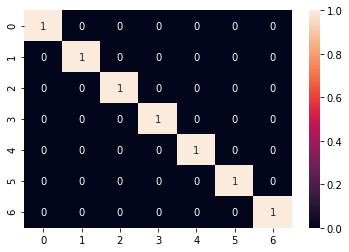

In [7]:
seed_num = seed.select_dtypes(include=['float64'])
model = PCA()
full_decorr = model.fit_transform(seed_num.values)
import seaborn as sns
sns.heatmap(pd.DataFrame(full_decorr).corr()>0.1,annot=True)
print('Model is with components of: ',model.n_components_)
print('Shape of our data is ',full_decorr.shape)

## Intrinsic Dimension

- Intrinsic dimension = number of features needed to approximate the dataset
- Essential idea behind dimension reduction
- What is the most compact representation of the samples?
- Can be detected with PCA

## PCA identifies intrinsic dimension

- PCA identies intrinsic dimension when samples have any number of features
- Intrinsic dimension = number of PCA features with signicant variance


mean [3.25860476 5.62853333]

first_pc [0.63910027 0.76912343]


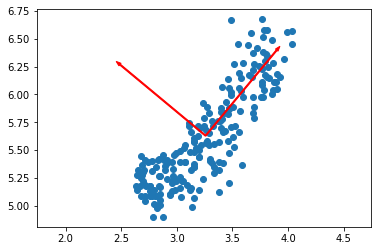

In [8]:
# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_
print('mean',mean,end='\n\n')
# Get the first principal component: first_pc
first_pc = model.components_[0,:]
second_pc = model.components_[1,:]
print('first_pc',first_pc)
# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

plt.arrow(mean[0], mean[1], second_pc[0], second_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

In [9]:
fish_url = 'https://raw.githubusercontent.com/iqbalamo93/Datasets/master/Clustering/fish.csv'
fish = pd.read_csv(fish_url)
print(fish.head(),end='\n\n')
print(fish['Species'].value_counts())
print(fish.info())

  Species  Weight  Length1  Length2  Length3  Height  Width
0   Bream   242.0     23.2     25.4     30.0    38.4   13.4
1   Bream   290.0     24.0     26.3     31.2    40.0   13.8
2   Bream   340.0     23.9     26.5     31.1    39.8   15.1
3   Bream   363.0     26.3     29.0     33.5    38.0   13.3
4   Bream   430.0     26.5     29.0     34.0    36.6   15.1

Bream    34
Roach    20
Pike     17
Smelt    14
Name: Species, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  85 non-null     object 
 1   Weight   85 non-null     float64
 2   Length1  85 non-null     float64
 3   Length2  85 non-null     float64
 4   Length3  85 non-null     float64
 5   Height   85 non-null     float64
 6   Width    85 non-null     float64
dtypes: float64(6), object(1)
memory usage: 4.8+ KB
None


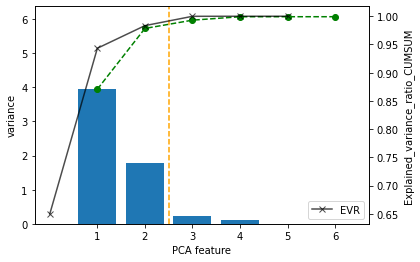

Specified components for this model is:
 6

explained_variance cumsum is:
 [3.94616746 5.72714653 5.97038212 6.07073397 6.07129711 6.07142857]

explained_variance_ratio's cumsum is:
 [0.64995699 0.94329472 0.98335706 0.99988559 0.99997835 1.        ]


In [10]:
samples = fish.iloc[:,1:].values
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler

scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances/ratios
feat = range(1,pca.n_components_+1)
plt.bar(feat,pca.explained_variance_)
plt.plot(feat,pca.explained_variance_.cumsum(), linestyle='dashed', marker='o',color='green',label='EV')
plt.axvline(2.5,linestyle='dashed',color='orange')
plt.xlabel('PCA feature')
plt.ylabel('variance')
par1 = plt.twinx()
par1.set_ylabel("Explained_variance_ratio_CUMSUM")
par1.plot(np.cumsum(pca.explained_variance_ratio_),marker='x',color='black',alpha=0.7,label='EVR')
plt.xticks(feat)
plt.legend(loc='lower right')
plt.show()

print('Specified components for this model is:\n',pca.n_components_,end='\n\n')
print('explained_variance cumsum is:\n',pca.explained_variance_.cumsum(),end='\n\n')
print('explained_variance_ratio\'s cumsum is:\n',pca.explained_variance_ratio_.cumsum())

## Performing clutering post Dimension reduction

(85, 3)
(85, 6)


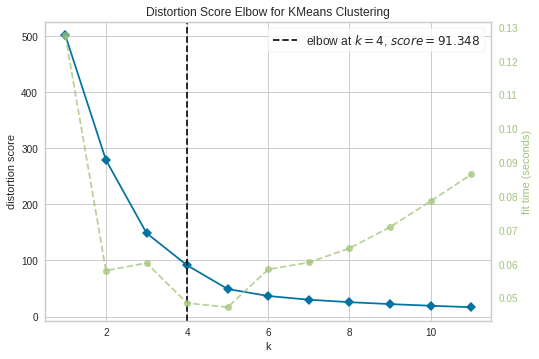

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
from sklearn.cluster import KMeans
kmeans_model = KMeans()
pc = PCA(n_components=3)#FROM EVR
scaler = StandardScaler()
data = scaler.fit_transform(samples)
features = pc.fit_transform(data)
print(features.shape)
print(samples.shape)
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(kmeans_model, k=(1,12))
visualizer.fit(features)        # Fit the data to the visualizer
visualizer.show() 

In [12]:
model = KMeans(n_clusters=4)
labels = model.fit_predict(features)
labels = pd.Series(labels)
data_cros=pd.concat([labels,fish.iloc[:,0]],axis=1)
data_cros.columns=['labels','names']
pd.crosstab(data_cros['labels'], data_cros['names'])

names,Bream,Pike,Roach,Smelt
labels,,,,
0,1,0,19,1
1,33,0,1,0
2,0,17,0,0
3,0,0,0,13


## Under the hood implementaion of EV/EVR

In [13]:
#The variance i.e. the eigenvalues of the covariance matrix is:
#the eigenvalues of the covariance matrix is
s = StandardScaler()
data = s.fit_transform(samples)

In [14]:
pca.explained_variance_

array([3.94616746, 1.78097907, 0.24323559, 0.10035185, 0.00056314,
       0.00013146])

In [15]:
U, S, V = np.linalg.svd(data, full_matrices=False)

In [16]:
explained_variance_ = (S ** 2) / (85 - 1)

In [17]:
explained_variance_

array([3.94616746, 1.78097907, 0.24323559, 0.10035185, 0.00056314,
       0.00013146])

## Dimension reduction with PCA :Summary

- Represents same data, using less features
- Important part of machine-learning pipelines
- Can be performed using PCA

### Specify how many features to keep

- Eg PCA(n_components=2)
-  Keeps the rst 2 PCA features
- Intrinsic dimension is a good choice



In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_samples = scaler.fit_transform(samples)

In [19]:
from sklearn.decomposition import PCA

# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(pca_features.shape)
print(pca.components_.shape)

(85, 2)
(2, 6)


### A tf-idf word-frequency array

we'll create a tf-idf word frequency array for a toy collection of documents. For this, use the TfidfVectorizer from sklearn. It transforms a list of documents into a word frequency array, which it outputs as a csr_matrix. It has fit() and transform() methods like other sklearn objects.

we are given a list documents of toy documents about pets. 

### Word frequency arrays

 Below is the visual example of <b>sparse</b> matrix.
<img src='https://github.com/iqbalamo93/Datasets/blob/master/Clustering/sparse_Matrix.png?raw=true'>

- Word frequency arrays
- Entries measure presence of each word in each document
- ... measure using "tf-idf"

In [20]:
documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']

In [21]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer() 

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)


[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
['cats', 'chase', 'dogs', 'meow', 'say', 'woof']


In [22]:
print(csr_mat)

  (0, 3)	0.680918560398684
  (0, 4)	0.5178561161676974
  (0, 0)	0.5178561161676974
  (1, 5)	0.680918560398684
  (1, 2)	0.5178561161676974
  (1, 4)	0.5178561161676974
  (2, 1)	0.680918560398684
  (2, 2)	0.5178561161676974
  (2, 0)	0.5178561161676974


## Clustering Wikipedia part I

Tf-Idf has been performed and is retrived from below url and processed

In [23]:
import pandas as pd
url = 'https://raw.githubusercontent.com/iqbalamo93/Datasets/master/Clustering/wikipedia-vectors.csv'
df_raw = pd.read_csv(url,index_col=0)
titles = df_raw.columns.to_list()
data = df_raw.transpose()#columns are documents, so transpose
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,...,12375,12376,12377,12378,12379,12380,12381,12382,12383,12384,12385,12386,12387,12388,12389,12390,12391,12392,12393,12394,12395,12396,12397,12398,12399,12400,12401,12402,12403,12404,12405,12406,12407,12408,12409,12410,12411,12412,12413,12414,12415,12416,12417,12418,12419,12420,12421,12422,12423,12424,12425,12426,12427,12428,12429,12430,12431,12432,12433,12434,12435,12436,12437,12438,12439,12440,12441,12442,12443,12444,12445,12446,12447,12448,12449,12450,12451,12452,12453,12454,12455,12456,12457,12458,12459,12460,12461,12462,12463,12464,12465,12466,12467,12468,12469,12470,12471,12472,12473,12474,12475,12476,12477,12478,12479,12480,12481,12482,12483,12484,12485,12486,12487,12488,12489,12490,12491,12492,12493,12494,12495,12496,12497,12498,12499,12500,12501,12502,12503,12504,12505,12506,12507,12508,12509,12510,12511,12512,12513,12514,12515,12516,12517,12518,12519,12520,12521,12522,12523,12524,12525,12526,12527,12528,12529,12530,12531,12532,12533,12534,12535,12536,12537,12538,12539,12540,12541,12542,12543,12544,12545,12546,12547,12548,12549,12550,12551,12552,12553,12554,12555,12556,12557,12558,1

In [24]:
print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, HTTP 404 to Adam Levine
Columns: 13125 entries, 0 to 13124
dtypes: float64(13125)
memory usage: 6.0+ MB
None
(60, 13125)


#Aim here is to decompose the Tf-Idf Matrics
we can decompose via SVD, or we can use PCA but PCA doesn't support processing oF CSR matrics and apply Kmeans.

In [25]:
from scipy.sparse.csr import csr_matrix
articles_csrformat = csr_matrix(data.values)
articles_matformat = data.values

# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)#Default randomized

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)
print(pipeline)
# Fit the pipeline to articles
pipeline.fit(articles_csrformat)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles_csrformat)

# Create a DataFrame aligning labels and titles: df
df_Clustering_wiki = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df_Clustering_wiki.sort_values('label'))


Pipeline(steps=[('truncatedsvd', TruncatedSVD(n_components=50)),
                ('kmeans', KMeans(n_clusters=6))])
    label                                        article
59      0                                    Adam Levine
50      0                                   Chad Kroeger
51      0                                     Nate Ruess
52      0                                     The Wanted
53      0                                   Stevie Nicks
58      0                                         Sepsis
55      0                                  Black Sabbath
56      0                                       Skrillex
57      0                          Red Hot Chili Peppers
54      0                                 Arctic Monkeys
21      1                             Michael Fassbender
28      1                                  Anne Hathaway
27      1                                 Dakota Fanning
26      1                                     Mila Kunis
25      1                    

### Comparing when using PCA as decomposition

In [26]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = PCA(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)
print(pipeline,end='\n\n')
# Fit the pipeline to articles
pipeline.fit(articles_matformat)

# Calculate the cluster labels: labels
labels_pca = pd.Series(pipeline.predict(articles_matformat))

# Create a DataFrame aligning labels and titles: df
df_Clustering_wiki = pd.concat([df_Clustering_wiki,labels_pca],axis=1)
df_Clustering_wiki.columns=['Labels_TruncatedSVD','Article','PCA']
# Display df sorted by cluster label
print(df_Clustering_wiki.sort_values('Labels_TruncatedSVD'))


Pipeline(steps=[('pca', PCA(n_components=50)),
                ('kmeans', KMeans(n_clusters=6))])

    Labels_TruncatedSVD                                        Article  PCA
59                    0                                    Adam Levine    1
50                    0                                   Chad Kroeger    1
51                    0                                     Nate Ruess    1
52                    0                                     The Wanted    1
53                    0                                   Stevie Nicks    1
58                    0                                         Sepsis    1
55                    0                                  Black Sabbath    1
56                    0                                       Skrillex    1
57                    0                          Red Hot Chili Peppers    1
54                    0                                 Arctic Monkeys    1
21                    1                             Michael Fassb

Fantastic! Take a look at the cluster labels and see if you can identify any patterns!

## Non-negative matrix factorization

- NMF = "non-negative matrix factorization"
- Dimension reduction technique
- NMF models are interpretable (unlike PCA)
- Easy to interpret means easy to explain!

However, all sample features must be non-negative (>= 0)

## NMF applied to Wikipedia articles

In [28]:
# Perform the necessary imports
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
nmf = NMF(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(nmf, kmeans)
print(pipeline,end='\n\n')
# Fit the pipeline to articles
pipeline.fit(articles_matformat)

# Calculate the cluster labels: labels
labels_NMF_WRONG = pd.Series(pipeline.predict(articles_matformat))

# Create a DataFrame aligning labels and titles: df
df_Clustering_wiki = pd.concat([df_Clustering_wiki,labels_NMF_WRONG],axis=1)
df_Clustering_wiki.columns=['Labels_TruncatedSVD','Article','PCA','NMF_WRONG']
# Display df sorted by cluster label
print(df_Clustering_wiki.sort_values('Labels_TruncatedSVD'))


Pipeline(steps=[('nmf', NMF(n_components=50)),
                ('kmeans', KMeans(n_clusters=6))])

    Labels_TruncatedSVD                                        Article  PCA  \
59                    0                                    Adam Levine    1   
50                    0                                   Chad Kroeger    1   
51                    0                                     Nate Ruess    1   
52                    0                                     The Wanted    1   
53                    0                                   Stevie Nicks    1   
58                    0                                         Sepsis    1   
55                    0                                  Black Sabbath    1   
56                    0                                       Skrillex    1   
57                    0                          Red Hot Chili Peppers    1   
54                    0                                 Arctic Monkeys    1   
21                    1         

In [29]:
df_Clustering_wiki

,Labels_TruncatedSVD,Article,PCA,NMF_WRONG
0,2,HTTP 404,3,1
1,2,Alexa Internet,3,1
2,2,Internet Explorer,3,1
3,2,HTTP cookie,3,1
4,2,Google Search,3,1
5,2,Tumblr,3,1
6,2,Hypertext Transfer Protocol,3,1
7,2,Social search,3,1
8,2,Firefox,3,5
9,2,LinkedIn,3,1


Mila Kunis and Hepatitis C cant' be in same group: THis is expected as this is wrong implemetaion of NMF

In [30]:
print(articles_csrformat.shape)
print(articles_csrformat[0])

(60, 13125)
  (0, 16)	0.024688249778400003
  (0, 32)	0.0239370711117
  (0, 33)	0.0210896267411
  (0, 137)	0.012295430569100001
  (0, 170)	0.0201970729329
  (0, 176)	0.013691446540099999
  (0, 306)	0.0202448587683
  (0, 384)	0.0300214109746
  (0, 442)	0.0156524310024
  (0, 498)	0.0169308799695
  (0, 504)	0.029291794862900004
  (0, 594)	0.033829482483
  (0, 617)	0.0129978625997
  (0, 689)	0.0132663498394
  (0, 714)	0.0210351304783
  (0, 887)	0.0153774718852
  (0, 953)	0.057097106304
  (0, 965)	0.0241013794769
  (0, 986)	0.0200325761598
  (0, 1089)	0.0174320390598
  (0, 1216)	0.0127849075552
  (0, 1314)	0.0267947689228
  (0, 1418)	0.017119438416
  (0, 1437)	0.0325627503942
  (0, 1497)	0.0350909326779
  :	:
  (0, 12145)	0.10392622131899999
  (0, 12160)	0.0814636288671
  (0, 12311)	0.062466358031500004
  (0, 12344)	0.0279286840993
  (0, 12396)	0.0194138482262
  (0, 12433)	0.0230980614776
  (0, 12448)	0.00930930077607
  (0, 12460)	0.0198721995991
  (0, 12522)	0.0182780669635
  (0, 12534)	0.0

In [31]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components=6)

# Transform the articles: nmf_features
nmf_features = model.fit_transform(articles_csrformat) #This is A

print('Shape of our NMF featues ',nmf_features.shape)
print('Shape of component is',model.components_.shape,end='\n\n')
# Print the NMF features
print(nmf_features.round(2)[:5])
# Import pandas
import pandas as pd

# Create a pandas DataFrame: df
df_NMF = pd.DataFrame(data=nmf_features,index=titles)


# Create a pandas DataFrame: df
df = pd.DataFrame(data=nmf_features,index=titles)

# Print the row for 'Anne Hathaway'
print(df.loc[['Anne Hathaway','Denzel Washington','Jennifer Aniston','Jessica Biel','350.org','Nigel Lawson'],:])

Shape of our NMF featues  (60, 6)
Shape of component is (6, 13125)

[[0.   0.   0.   0.   0.   0.44]
 [0.   0.   0.   0.   0.   0.57]
 [0.   0.   0.   0.   0.   0.4 ]
 [0.   0.   0.   0.   0.   0.38]
 [0.   0.   0.   0.   0.   0.49]]
                          0         1         2         3         4         5
Anne Hathaway      0.003862  0.000000  0.000000  0.575627  0.000000  0.000000
Denzel Washington  0.000000  0.005606  0.000000  0.422324  0.000000  0.000000
Jennifer Aniston   0.002267  0.001395  0.000000  0.527865  0.012027  0.014953
Jessica Biel       0.000000  0.000000  0.000000  0.498028  0.000000  0.000000
350.org            0.005652  0.018355  0.376565  0.032539  0.000000  0.011333
Nigel Lawson       0.012018  0.006503  0.312274  0.060964  0.011385  0.019259


Great work! Notice that for both actors, the NMF feature 3 has by far the highest value. This means that both articles are reconstructed using mainly the 3rd NMF component. why: NMF components represent topics (for instance, acting!)

In [32]:
url_words='https://raw.githubusercontent.com/iqbalamo93/Datasets/master/Clustering/wikipedia-vocabulary-utf8.txt'
words=pd.read_csv(url_words,header=None,index_col=None)
words=words.to_numpy().reshape(1,-1).tolist()
# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_,columns=words)

# Print the shape of the DataFrame
print(components_df.shape)

print('Sample component matrics ',components_df.iloc[:,:5],end='\n\n')

# Select row 3: component
component_Act = components_df.iloc[3,:]

component_Env = components_df.iloc[2,:]

# Print result of nlargest
print('High weigtage wordsfor component 3 \n',component_Act.nlargest(),end='\n\n')
print('High weigtage wordsfor component 2 \n',component_Env.nlargest(),end='\n\n')

(6, 13125)
Sample component matrics        aaron   abandon abandoned abandoning abandonment
0  0.011375  0.001210  0.000000   0.001738    0.000136
1  0.000000  0.000010  0.005663   0.000000    0.000002
2  0.000000  0.000008  0.000000   0.000000    0.004691
3  0.004149  0.000000  0.003056   0.000000    0.000614
4  0.000000  0.000568  0.004918   0.000000    0.000000
5  0.000139  0.000000  0.008749   0.000000    0.000185

High weigtage wordsfor component 3 
 film       0.627964
award      0.253167
starred    0.245318
role       0.211480
actress    0.186424
Name: 3, dtype: float64

High weigtage wordsfor component 2 
 climate       0.680591
emissions     0.560852
kyoto         0.260503
greenhouse    0.254316
global        0.250179
Name: 2, dtype: float64



## Explore the LED digits dataset

In the following exercises, you'll use NMF to decompose grayscale images into their commonly occurring patterns. Firstly, explore the image dataset and see how it is encoded as an array. You are given 100 images as a 2D array samples, where each row represents a single 13x8 image. The images in your dataset are pictures of a LED digital display.



In [33]:
import pandas as pd
digits_url = 'https://raw.githubusercontent.com/iqbalamo93/Datasets/master/Clustering/lcd-digits.csv'
da = pd.read_csv(digits_url,header=None,index_col=None)
samples = da.to_numpy()

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


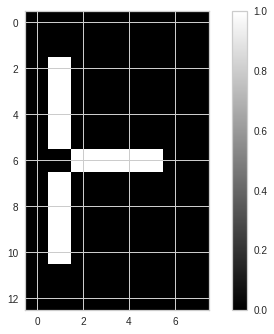

In [34]:
# Import pyplot
from matplotlib import pyplot as plt

# Select the 0th row: digit
digit = samples[-2]

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape(13,8)

# Print bitmap
print(bitmap)

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()


Excellent job! You'll explore this dataset further in the next exercise and see for yourself how NMF can learn the parts of images.

In [35]:
samples

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

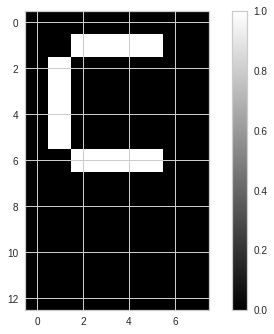

In [37]:
show_as_image(samples[9])

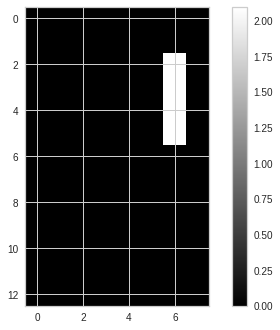

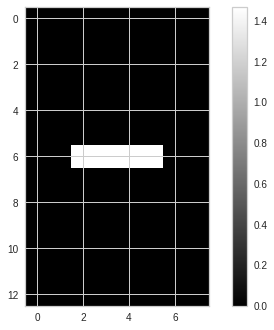

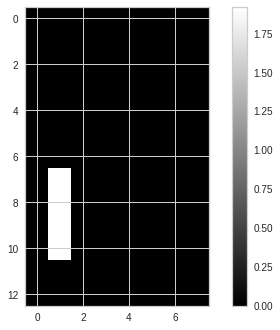

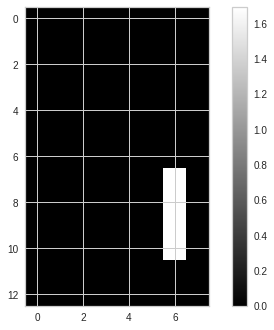

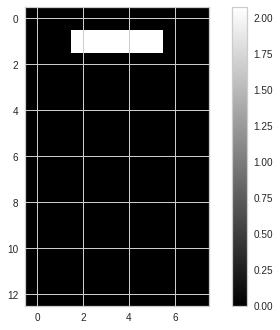

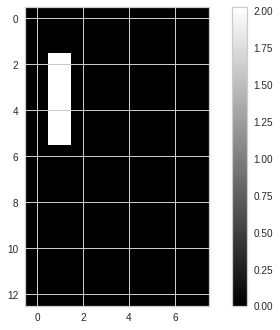

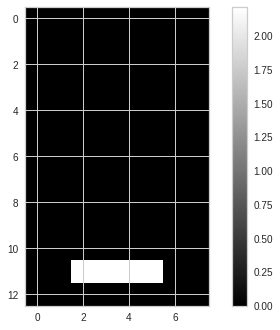

[0.47682356 0.         0.         0.59060505 0.48155944 0.
 0.        ]


In [38]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF model: model
model = NMF(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Assign the 0th row of features: digit_features
digit_features = features[0]

# Print digit_features
print(digit_features)

In [39]:
features.shape,model.components_.shape

((100, 7), (7, 104))

In [40]:
nmf_reconstructed = features@model.components_

In [41]:
def plot_digits(samples,recon):
    fig, axes = plt.subplots(20, 10, figsize=(16, 20),
                             subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.09, wspace=0.001))
    counter = 0
    counter_recons = 0
    for i in range(20):
        if  i%2: #odd rows 
            for x in range(10):
                axes[i,x].imshow(samples[counter].reshape((13, 8)),cmap='gray', interpolation='nearest')
                counter +=1
        else:
            for x in range(10):
                axes[i,x].imshow(recon[counter_recons].reshape((13, 8)),cmap='gray', interpolation='nearest')
                counter_recons +=1

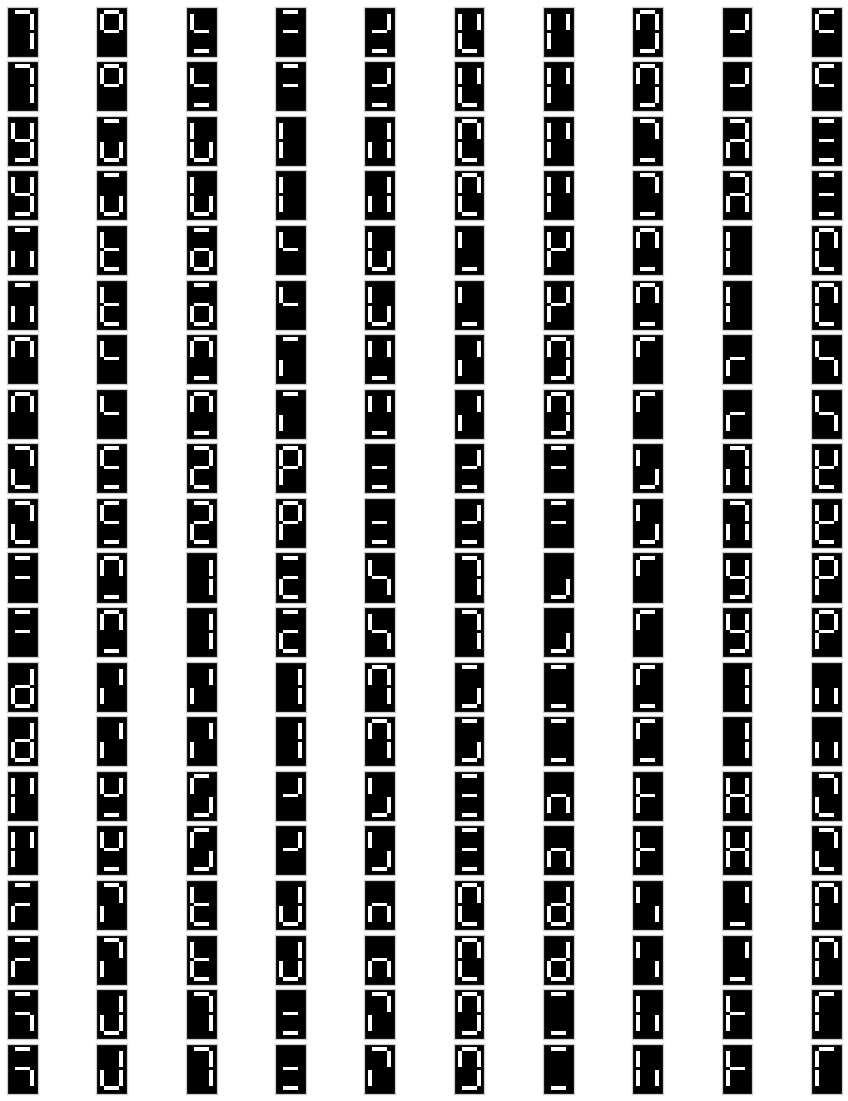

In [42]:
plot_digits(samples,nmf_reconstructed)

After you are done, take a moment to look through the plots and notice how NMF has expressed the digit as a sum of the components!

### PCA doesn't learn parts
Unlike NMF, PCA doesn't learn the parts of things. Its components do not correspond to topics (in the case of documents) or to parts of images, when trained on images. Verify this for yourself by inspecting the components of a PCA model fit to the dataset of LED digit images from the previous exercise. The images are available as a 2D array samples. Also available is a modified version of the show_as_image() function which colors a pixel red if the value is negative.

After submitting the answer, notice that the components of PCA do not represent meaningful parts of images of LED digits!



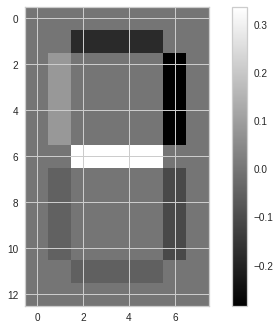

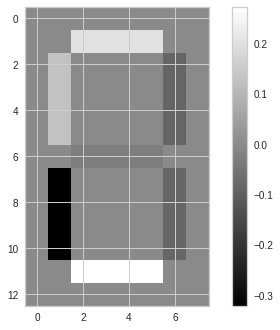

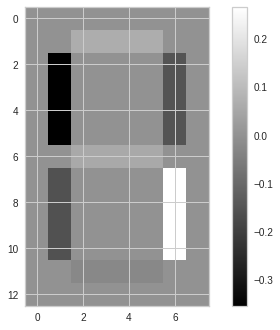

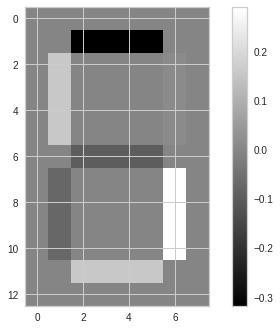

In [43]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA instance: model
model = PCA(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_[:4,:]:
    show_as_image(component)
    

In [44]:
rescon_PCA = features@model.components_

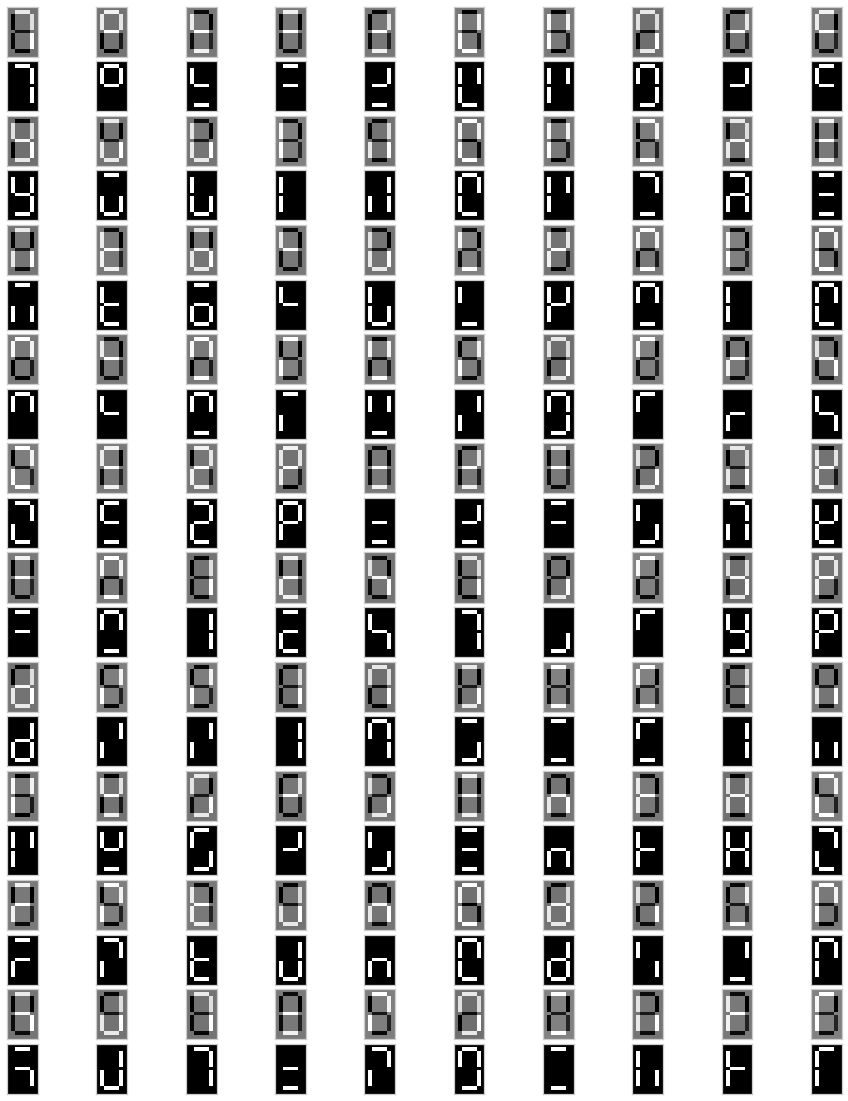

In [45]:
plot_digits(samples,rescon_PCA)

Great work! Notice that the components of PCA do not represent meaningful parts of images of LED digits!

### Building recommender system using NMF.

#### Finding similar articles

- Engineer at a large online newspaper
- Task :recommend articles similar to article being read by customer
- Similar articles should have similar topics

#### Cosine similarity
- Uses the angle between the lines
- Higher values means more similar
- Maximum value is 1, when angle is 0 degrees

## Which articles are similar to 'Cristiano Ronaldo'?

In [46]:
# Perform the necessary imports
import pandas as pd
from sklearn.preprocessing import normalize

# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features,index=titles)
print(df.shape)

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Cristiano Ronaldo']
print(article)
print(article.shape)
# Compute the dot products: similarities
similarities = df.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest())

(60, 6)
0    0.002523
1    0.999942
2    0.000859
3    0.010269
4    0.001947
5    0.000721
Name: Cristiano Ronaldo, dtype: float64
(6,)
Cristiano Ronaldo                1.000000
Franck Ribéry                    0.999972
Radamel Falcao                   0.999942
Zlatan Ibrahimović               0.999942
France national football team    0.999923
dtype: float64


In [47]:
from collections import defaultdict
dd = defaultdict(list)
for document in df.index.to_list():
    dd[document].append((df.dot(df.loc[document])).nlargest(10).index.to_list())

In [48]:
dd#NOw we have a dictionary that clubs all 10 similar documenst

defaultdict(list,
            {'HTTP 404': [['HTTP 404',
               'Alexa Internet',
               'HTTP cookie',
               'Google Search',
               'Social search',
               'Internet Explorer',
               'Hypertext Transfer Protocol',
               'Firefox',
               'Tumblr',
               'LinkedIn']],
             'Alexa Internet': [['HTTP 404',
               'Alexa Internet',
               'HTTP cookie',
               'Google Search',
               'Social search',
               'Internet Explorer',
               'Hypertext Transfer Protocol',
               'Firefox',
               'Tumblr',
               'LinkedIn']],
             'Internet Explorer': [['Internet Explorer',
               'HTTP 404',
               'Alexa Internet',
               'HTTP cookie',
               'Google Search',
               'Social search',
               'Hypertext Transfer Protocol',
               'Firefox',
               'Tumblr',
            

## Clustering on similarity matrix

In [49]:
data_sim = df.dot(df.T)

In [50]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = PCA(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)
print(pipeline,end='\n\n')
# Fit the pipeline to articles
pipeline.fit(data_sim.values)

# Calculate the cluster labels: labels
labels_nmf = pd.Series(pipeline.predict(data_sim.values))

# Create a DataFrame aligning labels and titles: df
df_Clustering_wiki = pd.concat([df_Clustering_wiki,labels_pca],axis=1)
df_Clustering_wiki.columns=['Labels_TruncatedSVD','Article','PCA','NMF_WRONG','data_sim.values']
# Display df sorted by cluster label
print(df_Clustering_wiki.sort_values('Labels_TruncatedSVD'))


Pipeline(steps=[('pca', PCA(n_components=50)),
                ('kmeans', KMeans(n_clusters=6))])

    Labels_TruncatedSVD                                        Article  PCA  \
59                    0                                    Adam Levine    1   
50                    0                                   Chad Kroeger    1   
51                    0                                     Nate Ruess    1   
52                    0                                     The Wanted    1   
53                    0                                   Stevie Nicks    1   
58                    0                                         Sepsis    1   
55                    0                                  Black Sabbath    1   
56                    0                                       Skrillex    1   
57                    0                          Red Hot Chili Peppers    1   
54                    0                                 Arctic Monkeys    1   
21                    1         

In [51]:
df_Clustering_wiki

,Labels_TruncatedSVD,Article,PCA,NMF_WRONG,data_sim.values
0,2,HTTP 404,3,1,3
1,2,Alexa Internet,3,1,3
2,2,Internet Explorer,3,1,3
3,2,HTTP cookie,3,1,3
4,2,Google Search,3,1,3
5,2,Tumblr,3,1,3
6,2,Hypertext Transfer Protocol,3,1,3
7,2,Social search,3,1,3
8,2,Firefox,3,5,3
9,2,LinkedIn,3,1,3


Great work - although you may need to know a little about football (or soccer, depending on where you're from!) to be able to evaluate for yourself the quality of the computed similarities!

## Recommend musical artists part

In this exercise and the next, you'll use what you've learned about NMF to recommend popular music artists! You are given a sparse array artists whose rows correspond to artists and whose columns correspond to users. The entries give the number of times each artist was listened to by each user.

In this exercise, build a pipeline and transform the array into normalized NMF features. The first step in the pipeline, MaxAbsScaler, transforms the data so that all users have the same influence on the model, regardless of how many different artists they've listened to. In the next exercise, you'll use the resulting normalized NMF features for recommendation!



In [52]:
url = 'https://raw.githubusercontent.com/iqbalamo93/Datasets/master/Clustering/scrobbler-small-sample.csv'
df = pd.read_csv(url)
df = df.sort_values(['artist_offset', 'user_offset'], ascending=[True, True])
#we sorted because provided list of artists starts from 0 index
artist_url= 'https://raw.githubusercontent.com/iqbalamo93/Datasets/master/Clustering/artists.csv'
artist_names =pd.read_csv(artist_url,header=None)
artist_names = artist_names.values.reshape(-1)
print('Unique users are: ',df['user_offset'].nunique(),'\nUnique artists are: ',df['artist_offset'].nunique(),
      end='\n\n')
print(df.head(),end='\n\n')

from scipy.sparse import csr_matrix

data = df['playcount'].values.reshape(-1)#entries give the number of times each artist was listened to by each user
row = df['artist_offset'].values.reshape(-1)#rows correspond to artists 
col = df['user_offset'].values.reshape(-1)#whose columns correspond to users

artists = csr_matrix((data, (row, col)))

#print(artists[:1])
print('Format of input data:',type(artists))
print('Total data points:',artists.size)#All data info
print('Shape of our data :',artists.shape,end='\n\n')


# Perform the necessary imports
from sklearn.decomposition import NMF
from sklearn.preprocessing import MaxAbsScaler, Normalizer
from sklearn.pipeline import make_pipeline

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components=20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler,nmf,normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(artists)

print(norm_features.shape)
# Import pandas
import pandas as pd

# Create a DataFrame: df
df = pd.DataFrame(norm_features,index=artist_names)

# Select row of 'Bruce Springsteen': artist
artist = df.loc['Bob Dylan']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest(6))

Unique users are:  500 
Unique artists are:  111

     user_offset  artist_offset  playcount
21             2              0        105
96            15              0        165
147           20              0         91
151           21              0         98
208           29              0        120

Format of input data: <class 'scipy.sparse.csr.csr_matrix'>
Total data points: 2894
Shape of our data : (111, 500)

(111, 20)
Bob Dylan            1.000000
Neil Young           0.960132
Ryan Adams           0.946997
Tom Waits            0.930636
Van Morrison         0.896550
Bruce Springsteen    0.865304
dtype: float64


Now we've computed the normalized NMF features, we'll use them in the recommend musical artists!

In [53]:
artist = df.loc['Bruce Springsteen']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest())

Bruce Springsteen    1.000000
Neil Young           0.958378
Leonard Cohen        0.917089
Van Morrison         0.873490
Bob Dylan            0.865304
dtype: float64
